### 📝 Project Summary  
**An end-to-end XGBoost pipeline for financial fraud detection with SMOTE-based imbalance handling, model explainability, and production-ready deployment.**


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/creditcard.csv")

# Show shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Basic dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
# Count of each class (0 = Not Fraud, 1 = Fraud)
class_counts = df['Class'].value_counts()

print("Transaction Class Distribution:")
print(class_counts)


Transaction Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3232\343844513.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='Set2')


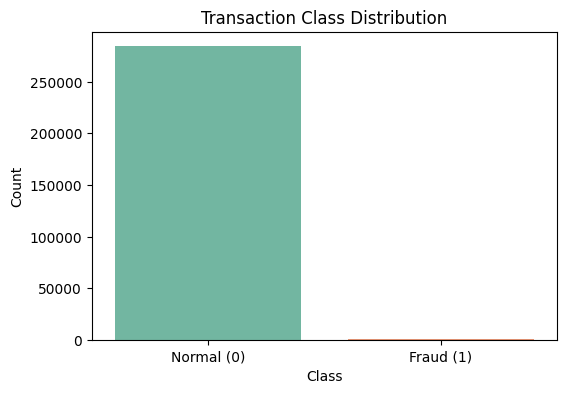

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title('Transaction Class Distribution')
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Create copies of columns to scale
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original columns (optional, to avoid redundancy)
df = df.drop(['Time', 'Amount'], axis=1)

# Reorder columns so scaled ones appear first
scaled_columns = ['scaled_time', 'scaled_amount']
other_columns = [col for col in df.columns if col not in scaled_columns + ['Class']]
df = df[scaled_columns + other_columns + ['Class']]

# Check result
df.head()


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (227845, 30)
Testing set: (56962, 30)


In [7]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Performance:\n")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, digits=4))


Logistic Regression Performance:

[[55406  1458]
 [    8    90]]
              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)

print("🌳 Decision Tree Evaluation:\n")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, digits=4))


🌳 Decision Tree Evaluation:

[[53967  2897]
 [   10    88]]
              precision    recall  f1-score   support

           0     0.9998    0.9491    0.9738     56864
           1     0.0295    0.8980    0.0571        98

    accuracy                         0.9490     56962
   macro avg     0.5146    0.9235    0.5154     56962
weighted avg     0.9981    0.9490    0.9722     56962



In [10]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("⚡ XGBoost Classifier Evaluation:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=4))


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost Classifier Evaluation:

[[56831    33]
 [   14    84]]
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7179    0.8571    0.7814        98

    accuracy                         0.9992     56962
   macro avg     0.8589    0.9283    0.8905     56962
weighted avg     0.9993    0.9992    0.9992     56962



In [11]:
from sklearn.model_selection import GridSearchCV

# Set up basic parameter grid
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01]
}

# GridSearch on XGBoost
grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_xgb.best_params_)

# Predict using best estimator
best_xgb = grid_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("🏆 Tuned XGBoost Evaluation:\n")
print(confusion_matrix(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb, digits=4))


Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:14:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
🏆 Tuned XGBoost Evaluation:

[[56763   101]
 [   12    86]]
              precision    recall  f1-score   support

           0     0.9998    0.9982    0.9990     56864
           1     0.4599    0.8776    0.6035        98

    accuracy                         0.9980     56962
   macro avg     0.7298    0.9379    0.8013     56962
weighted avg     0.9989    0.9980    0.9983     56962



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper function to evaluate models
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Collect metrics
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_log),
    evaluate_model("Decision Tree", y_test, y_pred_tree),
    evaluate_model("XGBoost (Default)", y_test, y_pred_xgb),
    evaluate_model("XGBoost (Tuned)", y_test, y_pred_best_xgb)
]

# Create DataFrame to display
import pandas as pd
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.round(4)


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.9743,0.0581,0.9184,0.1094
Decision Tree,0.9490,0.0295,0.8980,0.0571
XGBoost (Default),0.9992,0.7179,0.8571,0.7814
XGBoost (Tuned),0.9980,0.4599,0.8776,0.6035


C:\Users\user\AppData\Local\Temp\ipykernel_3232\608463203.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


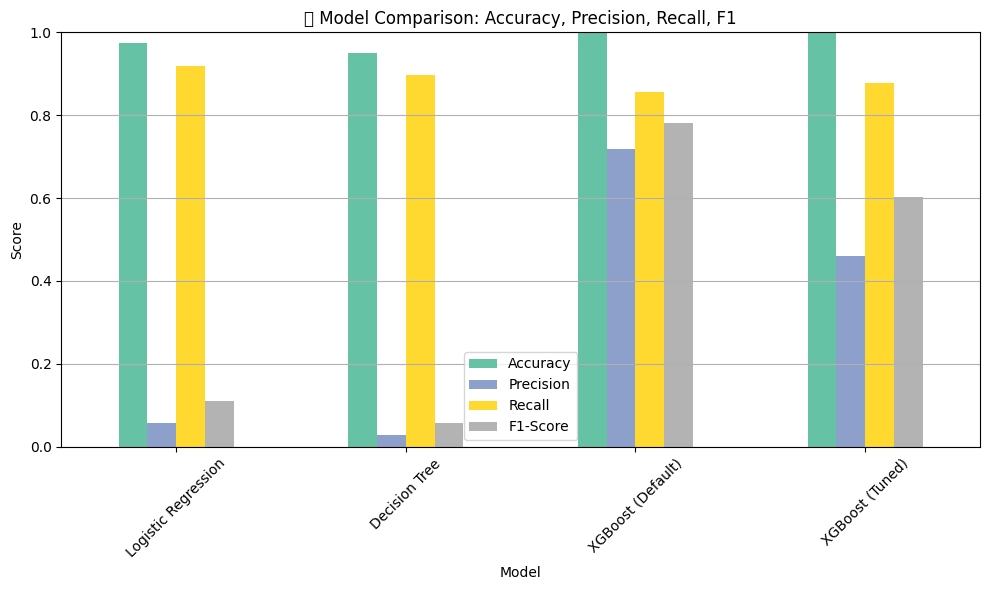

In [13]:
import matplotlib.pyplot as plt

# Bar plot of metrics
results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2')
plt.title('📊 Model Comparison: Accuracy, Precision, Recall, F1')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


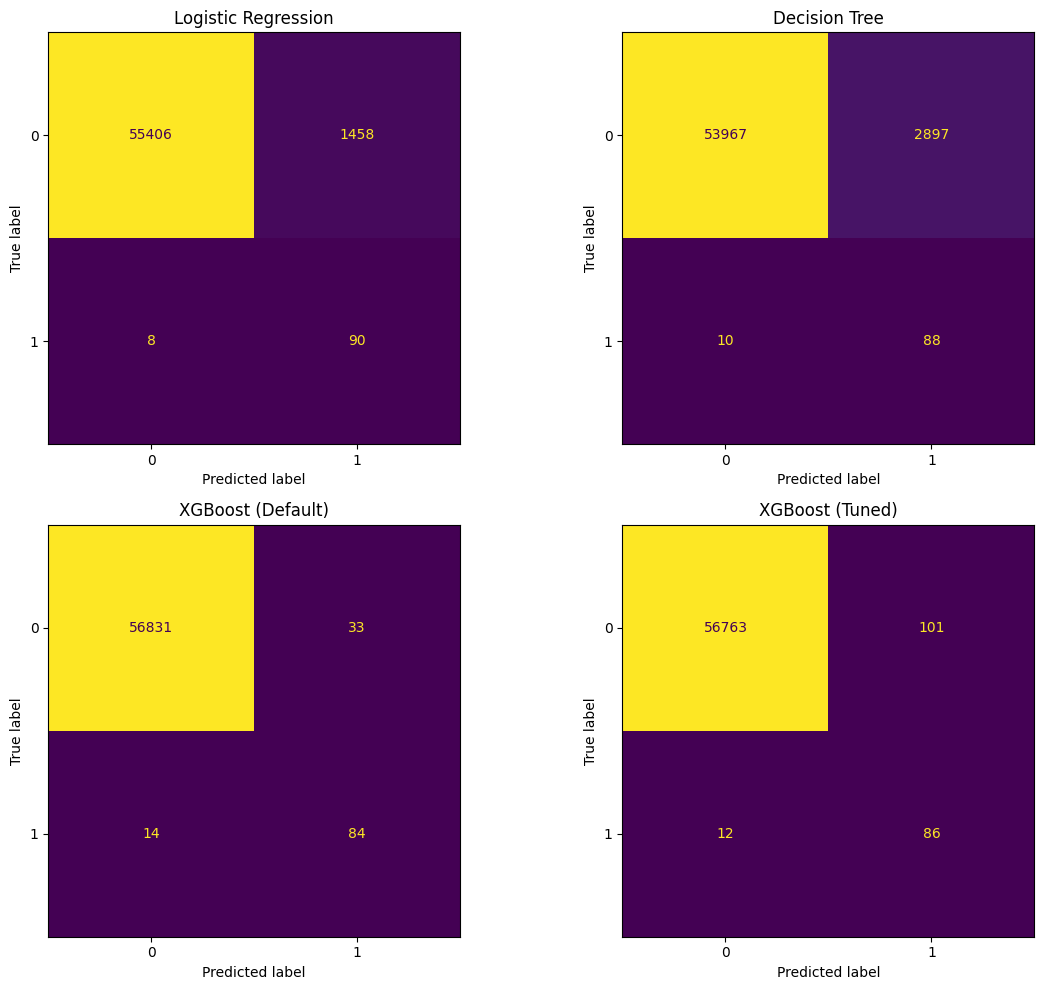

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

models_preds = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "XGBoost (Default)": y_pred_xgb,
    "XGBoost (Tuned)": y_pred_best_xgb
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, preds) in enumerate(models_preds.items()):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=axes[idx], colorbar=False)
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


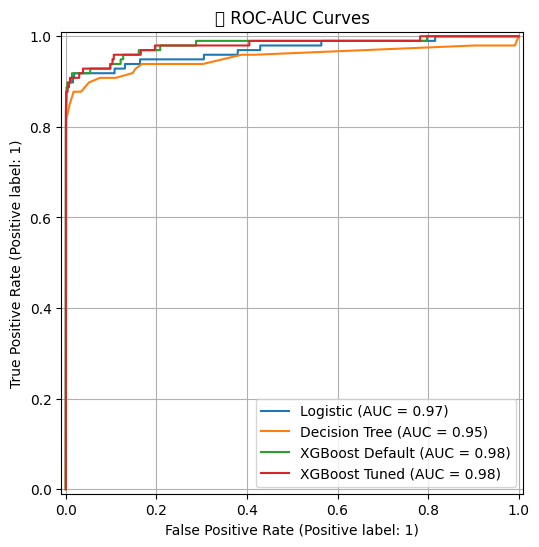

In [15]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))

# You can include as many models as you want here
RocCurveDisplay.from_estimator(log_model, X_test, y_test, ax=ax, name="Logistic")
RocCurveDisplay.from_estimator(tree_model, X_test, y_test, ax=ax, name="Decision Tree")
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax, name="XGBoost Default")
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test, ax=ax, name="XGBoost Tuned")

plt.title("📈 ROC-AUC Curves")
plt.grid()
plt.show()


In [16]:
import joblib

# Save tuned model
joblib.dump(best_xgb, 'xgboost_fraud_model.pkl')


['xgboost_fraud_model.pkl']

In [17]:
# Load model
loaded_model = joblib.load('xgboost_fraud_model.pkl')


In [18]:
# Create a synthetic new transaction (same number of features as training)
sample = X_test.iloc[0].values.reshape(1, -1)

# Predict using loaded model
prediction = loaded_model.predict(sample)

# Interpret output
print("🔍 Prediction:", "FRAUD" if prediction[0] == 1 else "LEGIT")


🔍 Prediction: LEGIT


In [19]:
batch_preds = loaded_model.predict(X_test[:10])
print(batch_preds)  # 0 = Legit, 1 = Fraud


[0 0 0 0 0 0 0 0 0 0]


In [20]:
import joblib
model = joblib.load('xgboost_fraud_model.pkl')


In [21]:
import shap

# Initialize the JS visualization in Jupyter
shap.initjs()


In [22]:
# Create TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)


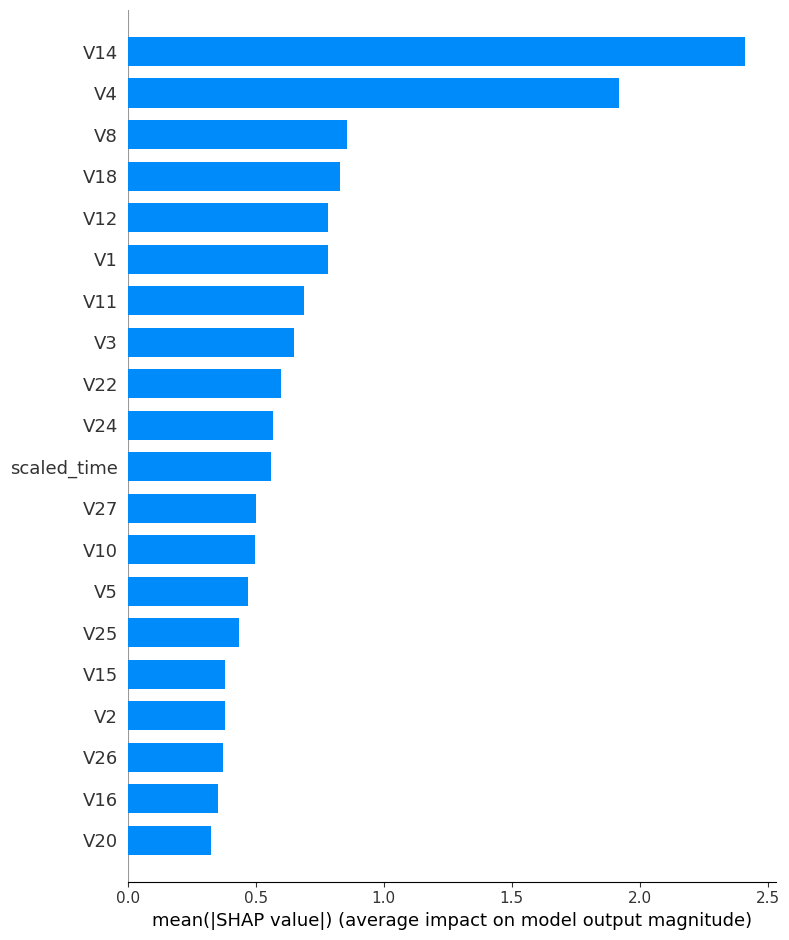

In [23]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


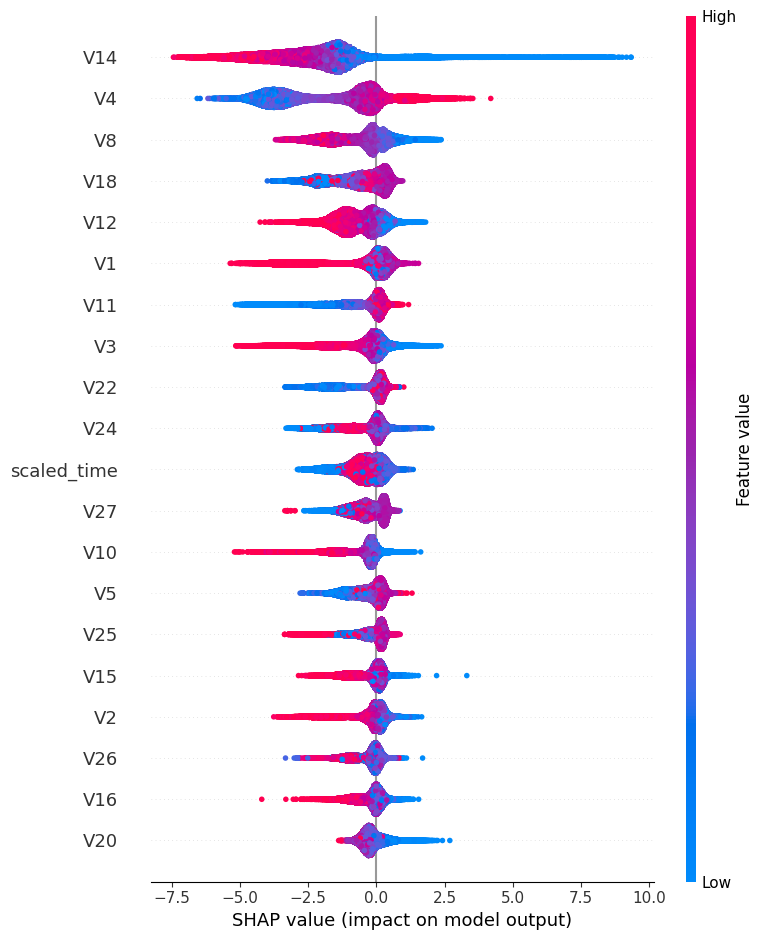

In [24]:
shap.summary_plot(shap_values, X_train)


In [25]:
# Select a sample (e.g., first row)
sample = X_train.iloc[0:1]

# Visualize force plot for that prediction
shap.force_plot(explainer.expected_value, shap_values[0], sample)


In [31]:
import os

# Create SHAP plots directory with compatibility for all OS
os.makedirs("notebook/plots", exist_ok=True)

# Confirm creation for commit
os.path.exists("notebook/plots")


True

In [32]:
import os

# Re-create directory after environment reset
os.makedirs("notebook/plots", exist_ok=True)

# Confirm creation
os.path.exists("notebook/plots")


True

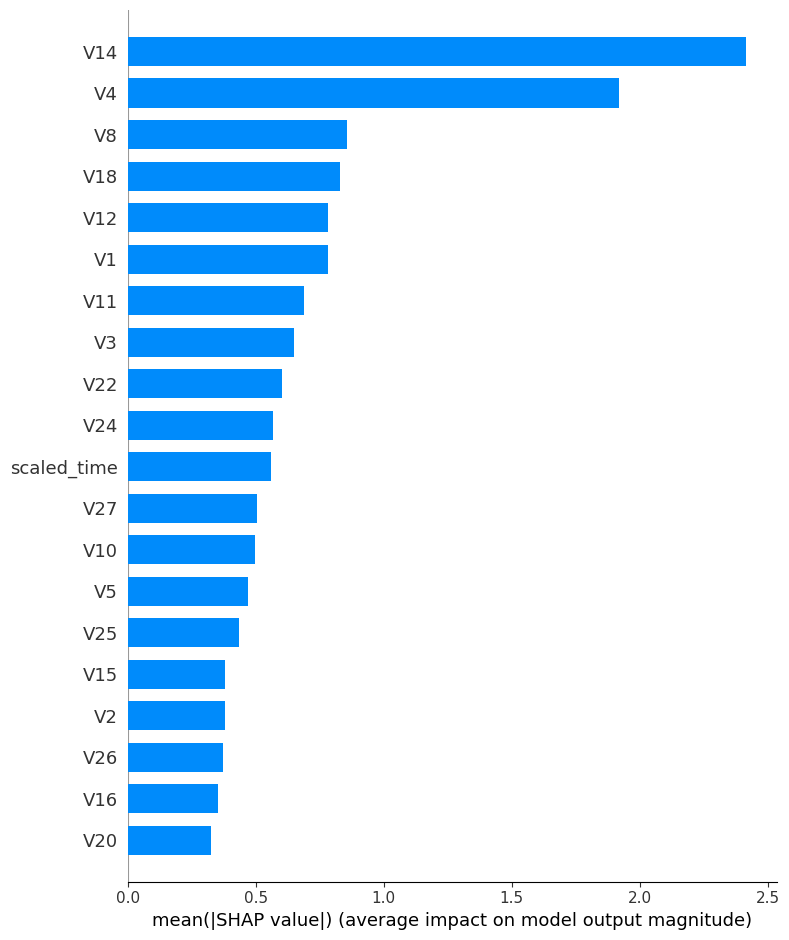

In [33]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("notebook/plots/shap_summary_bar.png", dpi=300)
